## Import the necessary libraries

In [ ]:
# for training and testing

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression

In [ ]:
# for data manipulation

import pandas as pd
import numpy as np
from numpy.typing import NDArray
from matplotlib import pyplot as plt
import seaborn as sns
import json
import category_encoders as ce
from category_encoders import wrapper
from scipy import stats

import yaml

## Working with dataset

In [ ]:

with open('config.yaml', 'r') as config:
    cfg = yaml.safe_load(config)


''' 
Reading all rows of the dataset

MARK: First first about 1kkk values of End_Lat and End_Lng are NaN, so it doesn't make sense to read these rows
WARNING: Please, check your RAM size before running the code with the whole dataset. All this code could fill up your RAM and swap memory limit (if u have one, sure)
'''
df = pd.read_csv(cfg["dataset"])

In [ ]:
# first 20 rows of the dataset
df.head(n=20)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
5,A-6,Source2,3,2016-02-08 07:44:26,2016-02-08 08:14:26,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
6,A-7,Source2,2,2016-02-08 07:59:35,2016-02-08 08:29:35,39.758274,-84.230507,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
7,A-8,Source2,3,2016-02-08 07:59:58,2016-02-08 08:29:58,39.770382,-84.194901,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
8,A-9,Source2,2,2016-02-08 08:00:40,2016-02-08 08:30:40,39.778061,-84.172005,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
9,A-10,Source2,3,2016-02-08 08:10:04,2016-02-08 08:40:04,40.100590,-82.925194,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [ ]:
# all keys of the dataset
df.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [ ]:
# let's see the nan values in the dataset
df.isna().sum().sort_values(ascending=False)

End_Lat                  3402762
End_Lng                  3402762
Precipitation(in)        2203586
Wind_Chill(F)            1999019
Wind_Speed(mph)           571233
Visibility(mi)            177098
Wind_Direction            175206
Humidity(%)               174144
Weather_Condition         173459
Temperature(F)            163853
Pressure(in)              140679
Weather_Timestamp         120228
Nautical_Twilight          23246
Civil_Twilight             23246
Sunrise_Sunset             23246
Astronomical_Twilight      23246
Airport_Code               22635
Street                     10869
Timezone                    7808
Zipcode                     1915
City                         253
Description                    5
Traffic_Signal                 0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Country                        0
Turning_Loop                   0
No_Exit                        0
End_Time  

(0.9999933671345569, 0.9999987660271595)

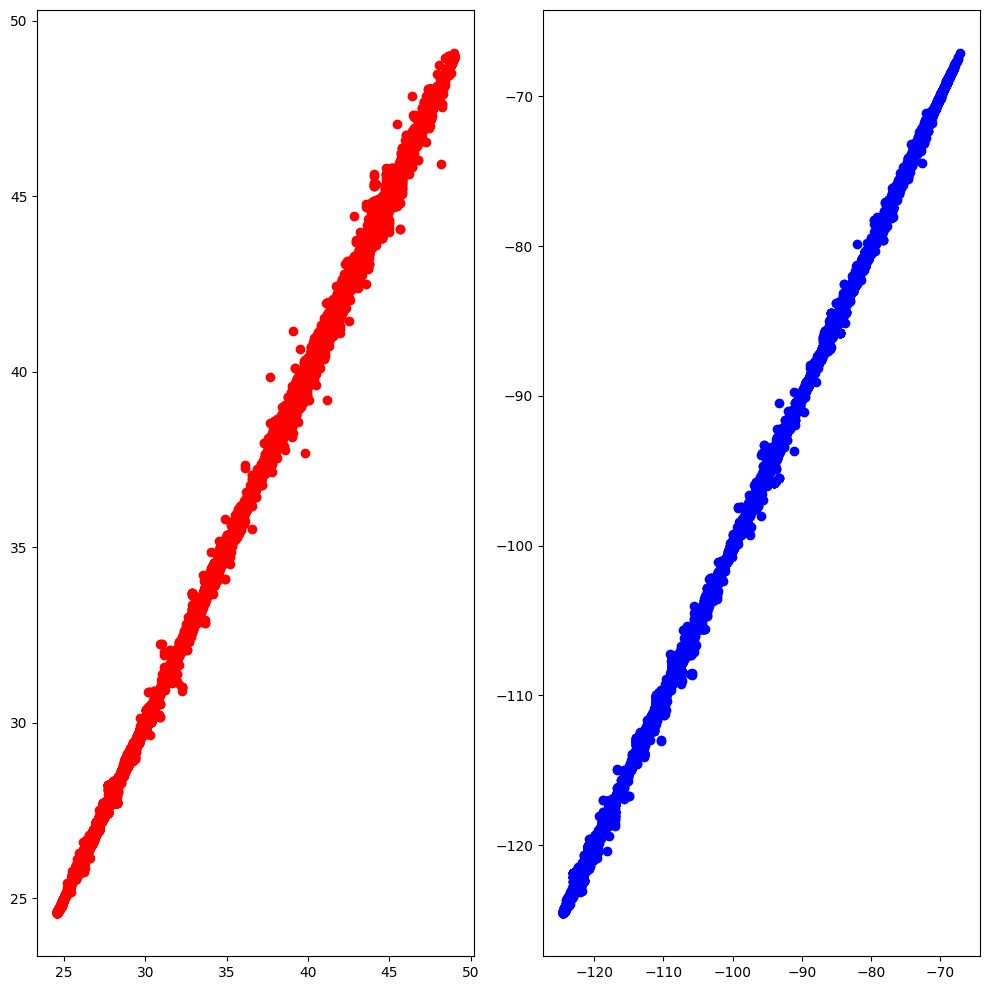

In [ ]:
# Visualizing correlation between start\end latitude\longitude. They're should be almost the same

fig, axes = plt.subplots(1, 2, figsize=(10, 10))
df_cor = df[['Start_Lat', 'End_Lat', 'Start_Lng', 'End_Lng']]
df_cor.dropna()
axes[0].plot(df_cor['Start_Lat'], df_cor['End_Lat'], 'ro', linestyle="None")
axes[1].plot(df_cor['Start_Lng'], df_cor['End_Lng'], 'bo', linestyle="None")
fig.tight_layout()

df['Start_Lat'].corr(df['End_Lat']), df['Start_Lng'].corr(df['End_Lng'])

In [ ]:
# As we can see, the correlation between start\end latitude\longitude is very high, so we can fill NaN values in the dataset
# In order to do that, we can use the mean of start and end coordinates as a new values

# MARK: instead of latitudes and longitudes keys there'll be new keys: Lat and Lng

def add_column_mean_coordinate(start: pd.Series, end: pd.Series) -> pd.Series:
    fill_end = end.fillna(start)
    new_series = (start + fill_end) / 2
    return new_series
 
df['Lat'] = add_column_mean_coordinate(df['Start_Lat'], df['End_Lat'])
df['Lng'] = add_column_mean_coordinate(df['Start_Lng'], df['End_Lng'])

In [ ]:
# So, let's see the now the percentage of NaN values in the dataset

nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
7,End_Lat,44.029355
8,End_Lng,44.029355
27,Precipitation(in),28.512858
21,Wind_Chill(F),25.865904
26,Wind_Speed(mph),7.391355
24,Visibility(mi),2.291524
25,Wind_Direction,2.267043
22,Humidity(%),2.253301
28,Weather_Condition,2.244438
20,Temperature(F),2.120143


In [ ]:
# Start_Lat, Start_Lng, End_Lat, End_Lng columns are not needed anymore, and also ID and Source columns are not needed
df.drop(columns=['ID', 'Source', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng'], inplace=True)

In [ ]:
# Discription of the dataset after the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 42 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Start_Time             object 
 2   End_Time               object 
 3   Distance(mi)           float64
 4   Description            object 
 5   Street                 object 
 6   City                   object 
 7   County                 object 
 8   State                  object 
 9   Zipcode                object 
 10  Country                object 
 11  Timezone               object 
 12  Airport_Code           object 
 13  Weather_Timestamp      object 
 14  Temperature(F)         float64
 15  Wind_Chill(F)          float64
 16  Humidity(%)            float64
 17  Pressure(in)           float64
 18  Visibility(mi)         float64
 19  Wind_Direction         object 
 20  Wind_Speed(mph)        float64
 21  Precipitation(in)      float64
 22  Weather_Condition 

In [ ]:
# We have numerical, boolean and categorical columns in the dataset. Let's see the number of columns in each type
num_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
bool_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
cat_df = df.select_dtypes(include=['object'])
len(num_df.columns), len(bool_df.columns), len(cat_df.columns)

(11, 13, 18)

In [ ]:
# And the names of the columns
num_df.columns, bool_df.columns, cat_df.columns

(Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Wind_Chill(F)',
        'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)', 'Lat', 'Lng'],
       dtype='object'),
 Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
        'Traffic_Signal', 'Turning_Loop'],
       dtype='object'),
 Index(['Start_Time', 'End_Time', 'Description', 'Street', 'City', 'County',
        'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code',
        'Weather_Timestamp', 'Wind_Direction', 'Weather_Condition',
        'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
        'Astronomical_Twilight'],
       dtype='object'))

_We have to look at the anomalies in the dataset._

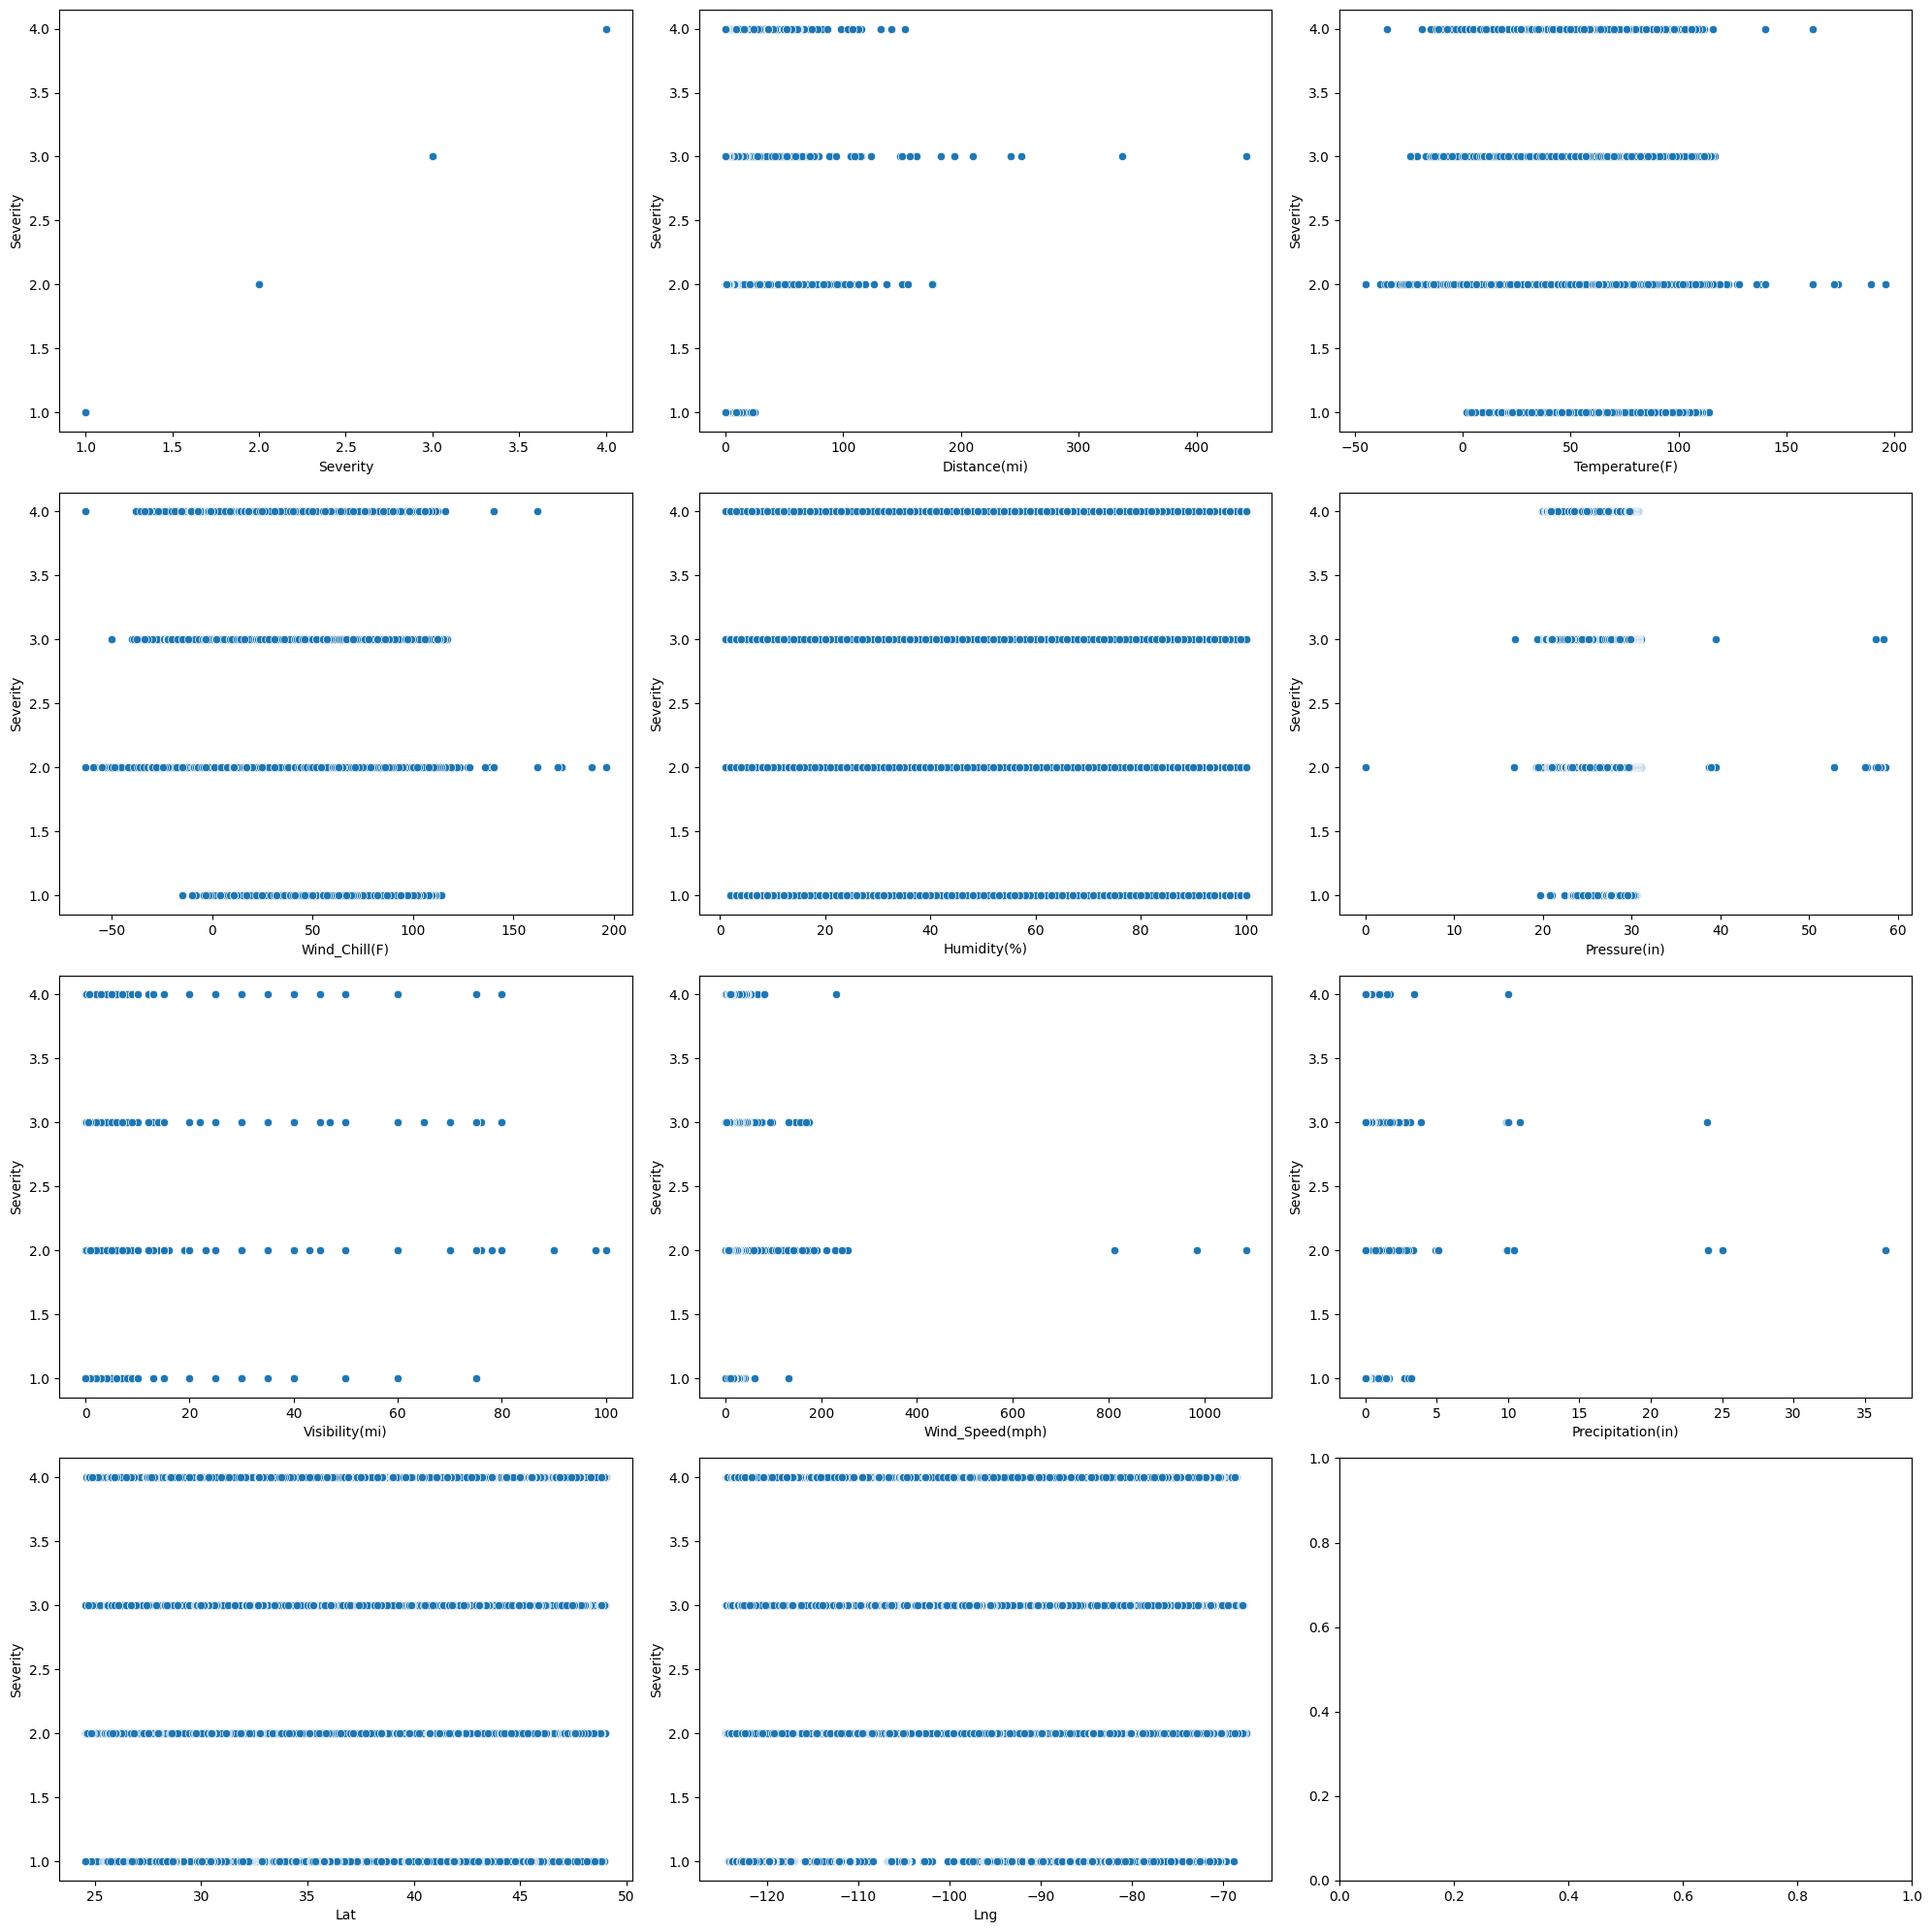

In [ ]:
# Visulizing the dependence of the severity on the numerical columns

fig, axes = plt.subplots(4, 3, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

for i in range(len(num_df.columns)):
    ax = axes_flattened[i]
    sns.scatterplot(
        x=num_df.iloc[:, i],
        y='Severity',
        data=num_df.dropna(),
        ax=ax,
    )
fig.tight_layout(pad=1.0)

_Result: Given almost clean numberical features._

In [ ]:
num_df.describe()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Lat,Lng
count,7.728394e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06,7.728394e+06,7.728394e+06
mean,2.212384e+00,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03,3.620124e+01,-9.470246e+01
std,4.875313e-01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01,5.076121e+00,1.739166e+01
min,1.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.455480e+01,-1.246238e+02
25%,2.000000e+00,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00,3.340053e+01,-1.172191e+02
50%,2.000000e+00,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00,3.582394e+01,-8.776708e+01
75%,2.000000e+00,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00,4.008495e+01,-8.035384e+01
max,4.000000e+00,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01,4.903779e+01,-6.711120e+01


In [ ]:
# Let's see the correlation between the all numerical columns
def corrplot(df_corr, method="pearson", annot=True, **kwargs):
    df_corr = df_corr.dropna()
    matrix_corr = df_corr.corr(method)
    sns.clustermap(
        df_corr.corr(method),
        vmin=-1.0,
        vmax=1.0,
        cmap="icefire",
        method="complete",
        annot=annot,
        **kwargs,
    )
    return matrix_corr

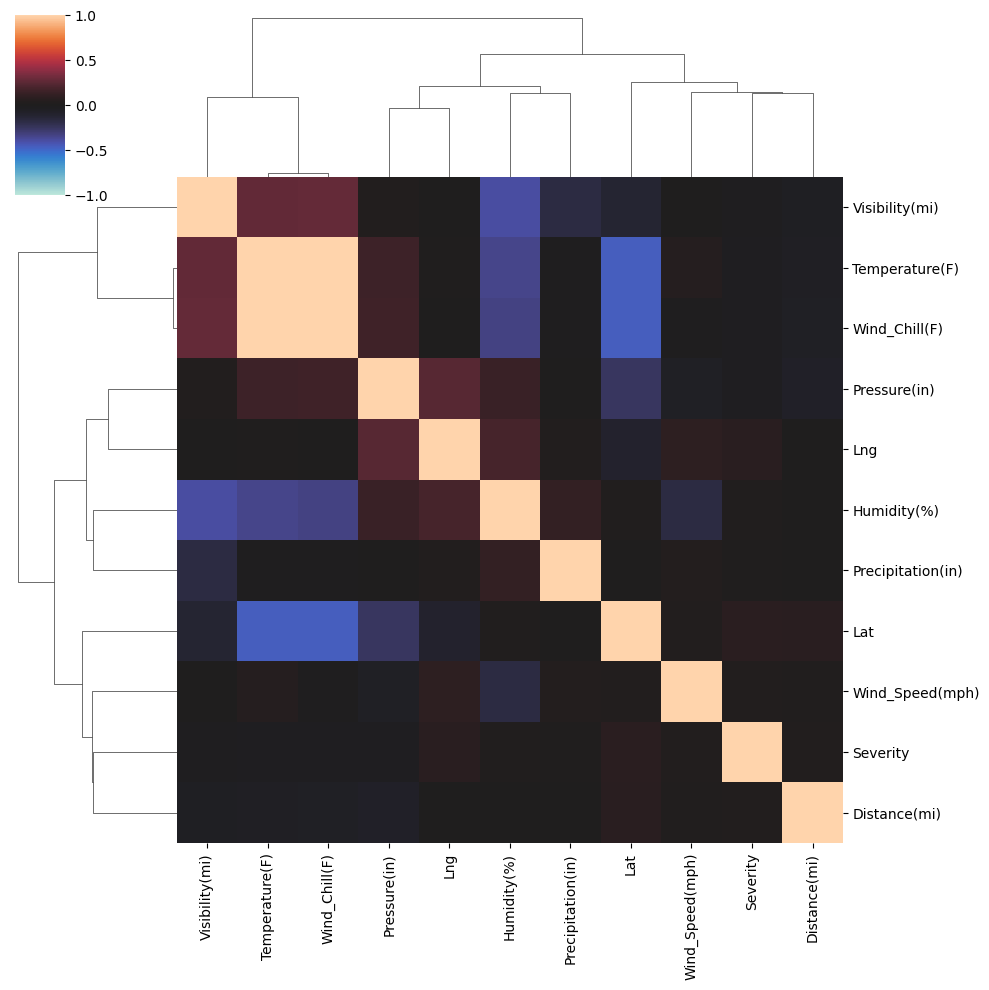

In [ ]:
# Plotting the correlation matrix
matrix_corr = corrplot(num_df, annot=None)

In [ ]:
matrix_corr

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Lat,Lng
Severity,1.000000,0.029875,-0.025364,-0.028382,0.021326,-0.031243,-0.018976,0.023749,0.015091,0.076677,0.069073
Distance(mi),0.029875,1.000000,-0.054196,-0.058670,0.007317,-0.072740,-0.042702,0.020969,0.004211,0.066109,-0.005485
Temperature(F),-0.025364,-0.054196,1.000000,0.993646,-0.347153,0.151725,0.267810,0.040504,-0.010513,-0.461545,0.015153
Wind_Chill(F),-0.028382,-0.058670,0.993646,1.000000,-0.331021,0.159783,0.274133,-0.014965,-0.010487,-0.465936,0.000651
Humidity(%),0.021326,0.007317,-0.347153,-0.331021,1.000000,0.138624,-0.397733,-0.179229,0.113278,0.017600,0.180802
Pressure(in),-0.031243,-0.072740,0.151725,0.159783,0.138624,1.000000,0.026032,-0.055706,0.006231,-0.254207,0.235483
Visibility(mi),-0.018976,-0.042702,0.267810,0.274133,-0.397733,0.026032,1.000000,0.000785,-0.173400,-0.123436,-0.006117
Wind_Speed(mph),0.023749,0.020969,0.040504,-0.014965,-0.179229,-0.055706,0.000785,1.000000,0.031887,0.028702,0.087563
Precipitation(in),0.015091,0.004211,-0.010513,-0.010487,0.113278,0.006231,-0.173400,0.031887,1.000000,-0.007288,0.029642
Lat,0.076677,0.066109,-0.461545,-0.465936,0.017600,-0.254207,-0.123436,0.028702,-0.007288,1.000000,-0.096840


In [ ]:
# Correlation between Wind_chill and Temperature is very high, so we can drop Wind_Chill column
df.drop(columns=['Wind_Chill(F)'], inplace=True)

In [ ]:
# Let's see the null values in the dataset
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)

In [ ]:
nan_df.head(20)

,column_name,percentage
20,Precipitation(in),28.512858
19,Wind_Speed(mph),7.391355
17,Visibility(mi),2.291524
18,Wind_Direction,2.267043
15,Humidity(%),2.253301
21,Weather_Condition,2.244438
14,Temperature(F),2.120143
16,Pressure(in),1.820288
13,Weather_Timestamp,1.555666
35,Sunrise_Sunset,0.300787


In [ ]:
# In order to fill the NaN values in the dataset, we can use the mean of the columns
# Filling only these columns
nan_num_column = ['Wind_Speed(mph)', #mean
                  'Visibility(mi)', #mean
                  'Humidity(%)', #mean
                  'Temperature(F)', #mean
                  'Pressure(in)', #mean
                  'Precipitation(in)' #mean
                  ]

In [ ]:
for col_name in nan_num_column:
    df[col_name] = df.groupby('Severity')[col_name].transform(lambda x: x.fillna(x.mean()))

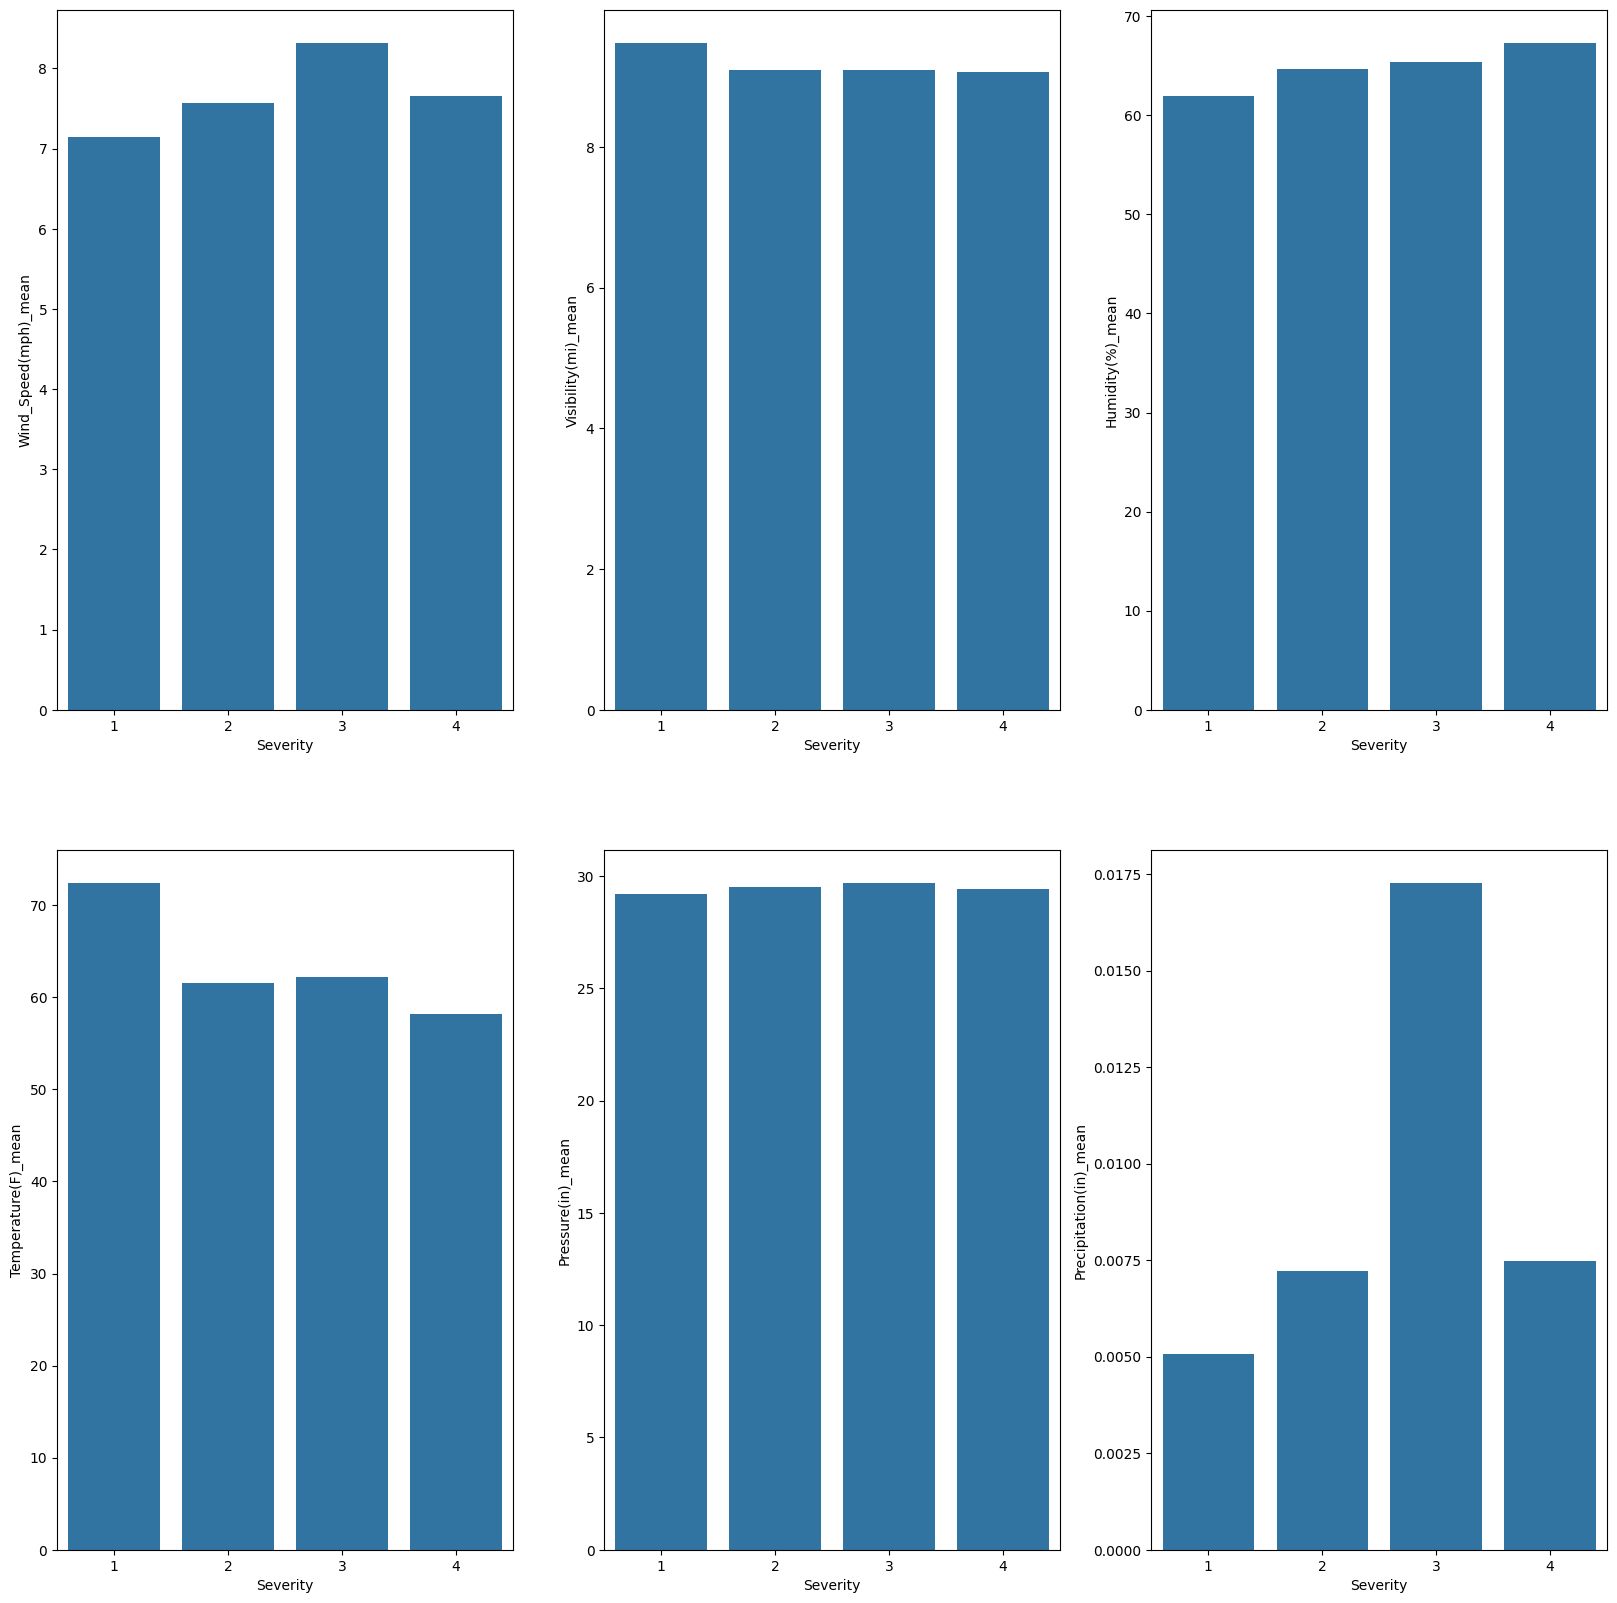

In [ ]:
'''
As we have to classify the severity of the accident, we must check the distribution 
of the severity in the dataset by looking at the mean of the numerical columns grouped by the severity
'''

fig, axes = plt.subplots(2, 3, figsize=(20, 20))
axes_flattened = axes.reshape(-1)
Severity_grouped = df.groupby('Severity')
for idx, col_name in enumerate(nan_num_column):
    ax = axes_flattened[idx]
    
    Severity_lot = (
    Severity_grouped[col_name].mean()
    .reset_index(name=f"{col_name}_mean")
    )
    sns.barplot(x='Severity',
                y=f"{col_name}_mean",
                data=Severity_lot, ax=ax)
    
plt.show()

### Removing the almost equaled features

In [ ]:
def get_almost_equaled_features(df: pd.DataFrame, dropna=True, limit: int = 96):
    '''
    This function returns the columns which have the same value in the most of the rows.
    
    limit: int - the limit of the percentage of the same value in the column. Default is 96
    dropna: bool - if True, the function will drop NaN values in the column. Default is True
    '''
    
    cols = []
    for i in df:
        if dropna:
            counts = df[i].dropna().value_counts()
        else:
            counts = df[i].value_counts()
        most_popular_value_count = counts.iloc[0]
        if (most_popular_value_count / len(df)) * 100 - limit > 0:
            cols.append(i)
    return cols


In [ ]:
overfit_cat = get_almost_equaled_features(cat_df, limit=96)
overfit_cat

['Country']

In [ ]:
# Dropping the Country column which have the same value in the most of the rows
df.drop(columns=["Country"], inplace=True)

In [ ]:
# Numerical features have no almost equaled values
overfit_num = get_almost_equaled_features(num_df, dropna=True, limit=96)
overfit_num

[]

In [ ]:
# Boolean features have'em a lot though, but we can't drop them, because they're important
overfit_bool = get_almost_equaled_features(bool_df, dropna=True, limit=99)
overfit_bool

['Bump',
 'Give_Way',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Traffic_Calming',
 'Turning_Loop']

In [ ]:
df.columns

Index(['Severity', 'Start_Time', 'End_Time', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'Lat', 'Lng'],
      dtype='object')

### Removing the "release" anomalies in the dataset

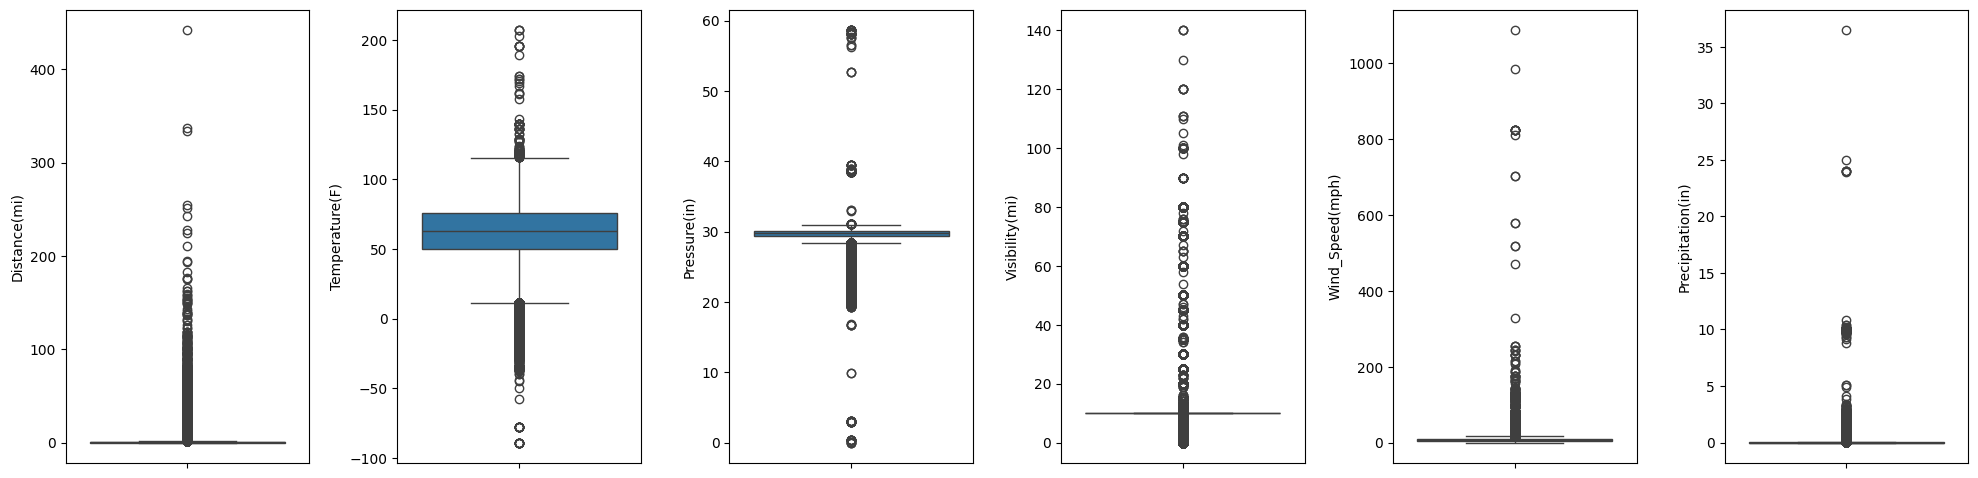

In [ ]:
# Let's check out the distribution of some numerical columns
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]

fig, axes = plt.subplots(1, 6, figsize=(20, 5))
for ax, col in zip(axes, out_col):
    sns.boxplot(y=df[col], data=df, ax=ax)
fig.tight_layout(pad=1.5)

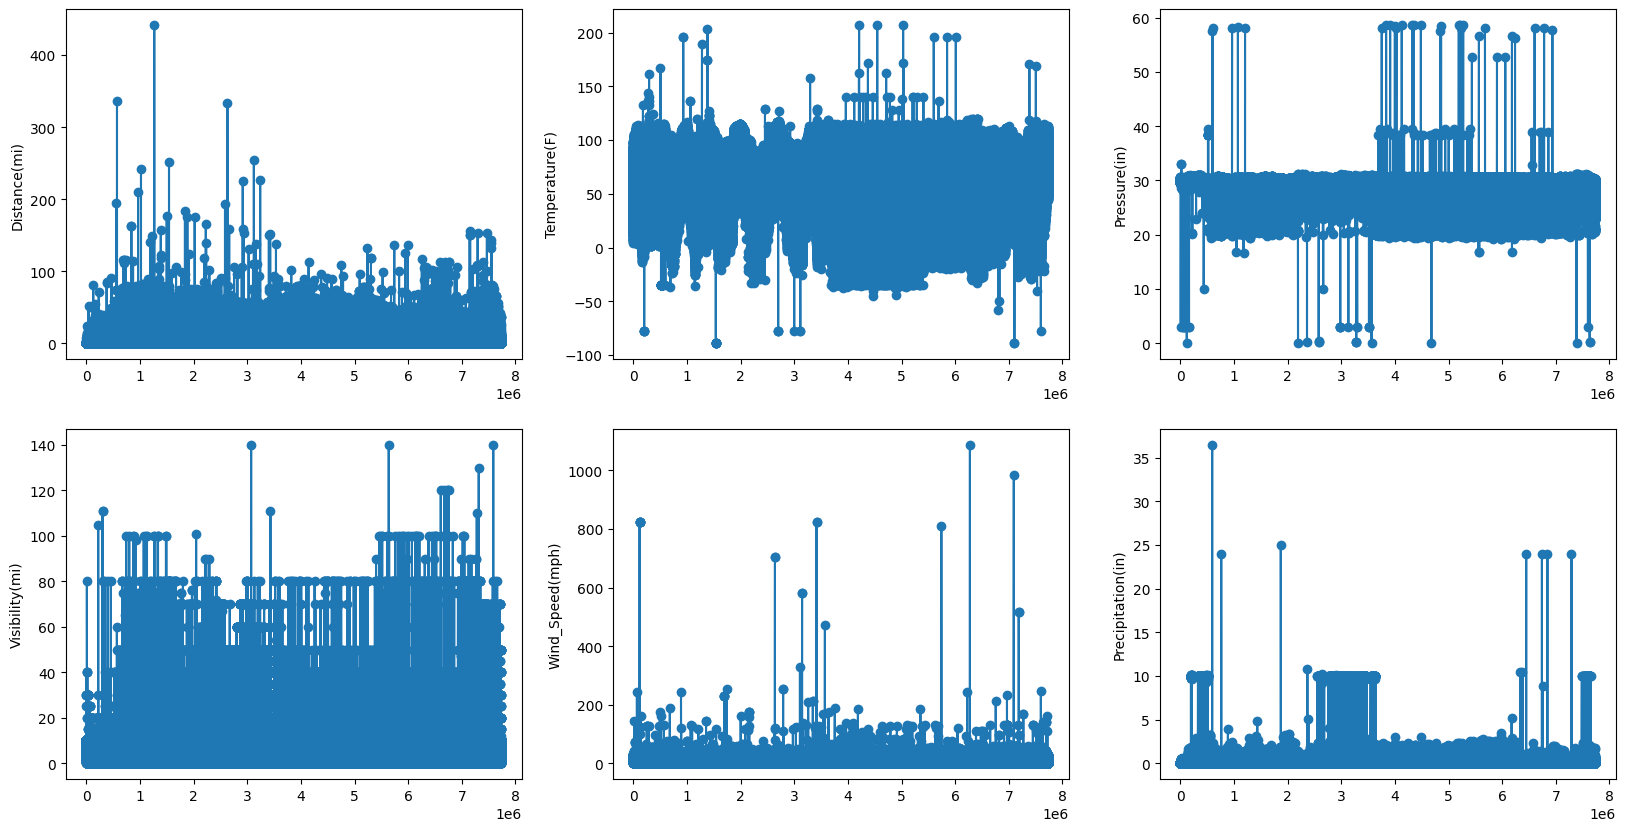

In [ ]:
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.flatten()

for index, column in enumerate(out_col):
    axes[index // 3][index % 3].plot(
        [i + 1 for i in range(len(df[column]))],
        df[column],
        marker='o'
    )
    axes[index // 3][index % 3].set_ylabel(column)

In [ ]:
# From the plots above we can see that there are some outliers in the dataset
# We can just crap them
for col, upper_bound, down_bound in (
    ('Distance(mi)', 150, -150),
    ('Temperature(F)', 150, -50),
    ('Pressure(in)', 50, 10),
    ('Visibility(mi)', 100, -100),
    ('Wind_Speed(mph)', 400, -400),
    ("Precipitation(in)",10, -15),
):
    df = df.drop(df[df[col] > upper_bound].index)
    df = df.drop(df[df[col] < down_bound].index)

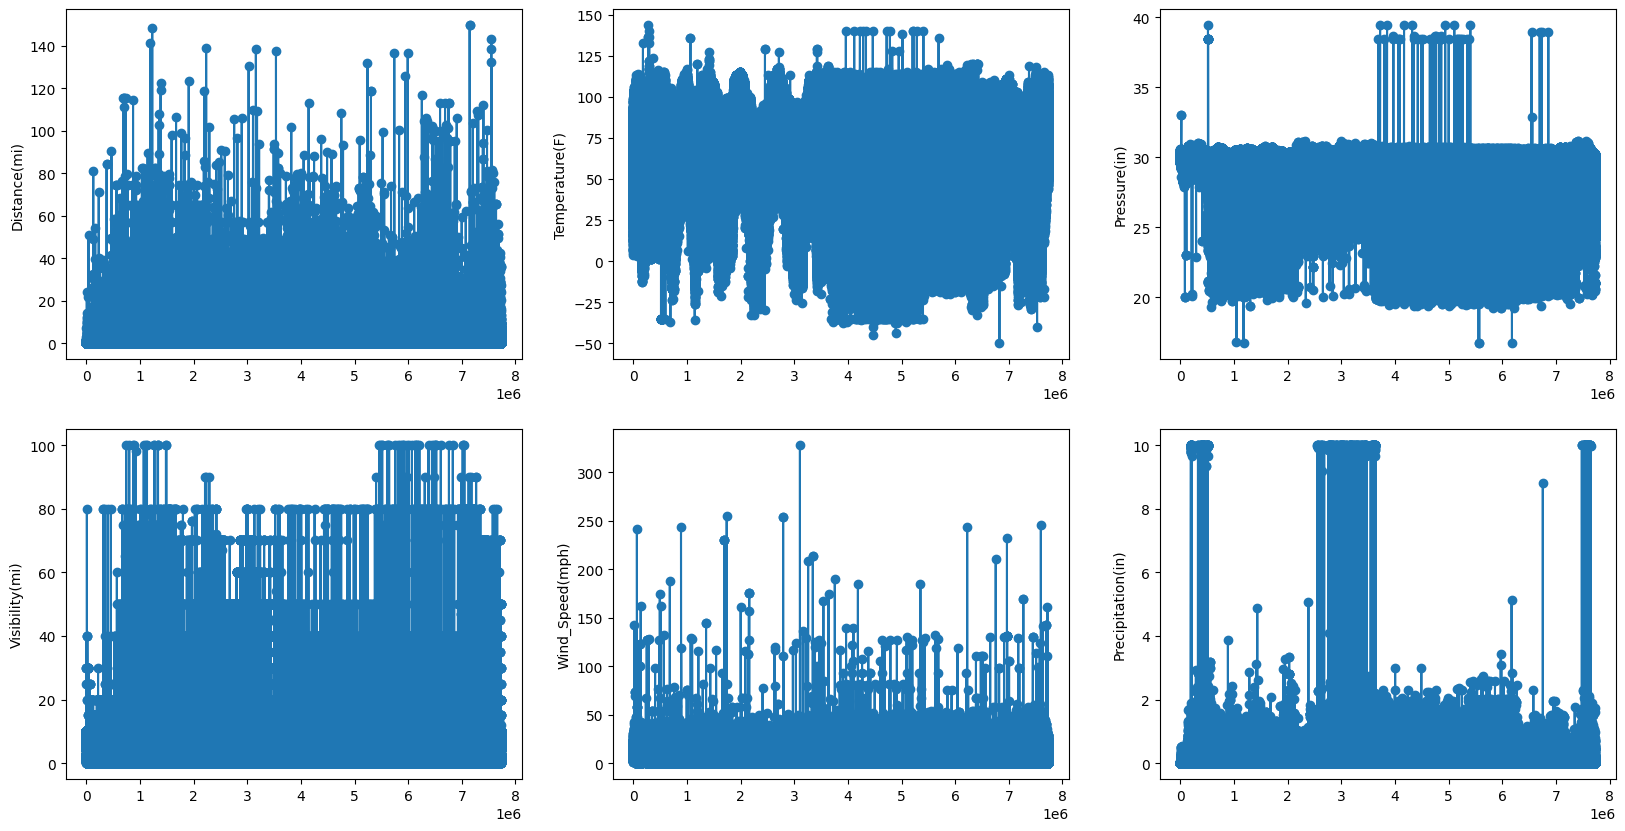

In [ ]:
# Now we have a minimum amount of outliers in the dataset
# It seems that the outliners a lot now, but we can't drop them, because they're so many in the some intervals 
out_col = ["Distance(mi)", "Temperature(F)", "Pressure(in)", "Visibility(mi)", "Wind_Speed(mph)", "Precipitation(in)"]
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_flattened = axes.flatten()

for index, column in enumerate(out_col):
    axes[index // 3][index % 3].plot(
        [i + 1 for i in range(len(df[column]))],
        df[column],
        marker='o'
    )
    axes[index // 3][index % 3].set_ylabel(column)

### Now, it's time to look at categorical features

In [ ]:
# Convert time and weather timestamps to accurate format
df['Start_Time'] = pd.to_datetime(df['Start_Time']).dt.round("S")
df['End_Time'] = pd.to_datetime(df['End_Time']).dt.round("S")
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp']).dt.round("S")

<BarContainer object of 2 artists>

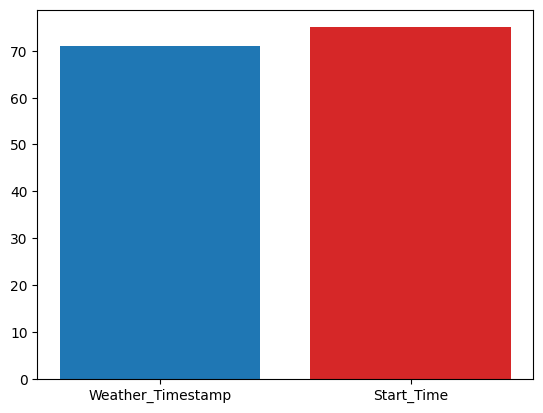

In [ ]:
delta_weather_timestamp = round((df['End_Time'] - df['Weather_Timestamp']).dt.total_seconds() / 60)
delta_start_time = round((df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60)
plt.bar(['Weather_Timestamp', 'Start_Time'], [delta_weather_timestamp.median(), delta_start_time.median()], color=['tab:blue', 'tab:red'])
# The difference between the weather timestamp and end time, and between end time and start time is almost the same

In [ ]:
# To avoid some errors in classification, we can fill the NaN values in the Weather_Timestamp column with the Start_Time values
df.loc[df['Weather_Timestamp'].isna(), 'Weather_Timestamp'] = df['Start_Time'].loc[df['Weather_Timestamp'].isna()]

In [ ]:
# To classify, we also have to add more readable columns for models. For example, year, month, day, hour

df['Start_Date_Year'] = df['Start_Time'].dt.year
df['Start_Date_Month'] = df['Start_Time'].dt.month
df['Start_Date_Day'] = df['Start_Time'].dt.day
df['Start_Date_Hour'] = df['Start_Time'].dt.hour

df['End_Date_Year'] = df['End_Time'].dt.year
df['End_Date_Month'] = df['End_Time'].dt.month
df['End_Date_Day'] = df['End_Time'].dt.day
df['End_Date_Hour'] = df['End_Time'].dt.hour

df['Weather_Datestamp_Year'] = df['Weather_Timestamp'].dt.year
df['Weather_Datestamp_Month'] = df['Weather_Timestamp'].dt.month
df['Weather_Datestamp_Day'] = df['Weather_Timestamp'].dt.day
df['Weather_Datestamp_Hour'] = df['Weather_Timestamp'].dt.hour

In [ ]:
# Also, time difference between start and end time can be useful for classification
df['Time_Difference'] = round((df['End_Time'] - df['Start_Time']).dt.total_seconds() / 60)

In [ ]:
# Dropping the Start_Time, End_Time and Weather_Timestamp columns, cause' they're not needed anymore
df.drop(columns=['Weather_Timestamp', 'Start_Time', 'End_Time'], inplace=True)

In [ ]:
# For understanding the time of the day, we can add a new column which will show the time of the day
# 1 - Day, 0 - Night.
new_twilight_names = {
    'Sunrise_Sunset': 'Is_Day',
    "Civil_Twilight": "Is_Civil_Day",
    "Nautical_Twilight": "Is_Twilight_Day",
    "Astronomical_Twilight": "Is_Astronomical_Day"
}
for column in new_twilight_names.keys():
    df[new_twilight_names[column]] = df[column].map({'Day': 1.0, 'Night': 0.0}).astype(float)
df.drop(columns=list(new_twilight_names.keys()), inplace=True)

In [ ]:
# Now we have 4 new columns. For example, here are Is_Day 
df['Is_Day']

0          0.0
1          0.0
2          0.0
3          0.0
4          1.0
          ... 
7728389    1.0
7728390    1.0
7728391    1.0
7728392    1.0
7728393    1.0
Name: Is_Day, Length: 7728168, dtype: float64

In [ ]:
# Let's see again number of columns in each type
num_df = df.select_dtypes(include=['int16', 'int32', 'int64', 'float16', 'float32', 'float64'])
bool_df = df.select_dtypes(exclude=['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'object'])
cat_df = df.select_dtypes(include=['object'])
len(num_df.columns), len(bool_df.columns), len(cat_df.columns)
num_df.columns, bool_df.columns, cat_df.columns

(Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
        'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
        'Precipitation(in)', 'Lat', 'Lng', 'Start_Date_Year',
        'Start_Date_Month', 'Start_Date_Day', 'Start_Date_Hour',
        'End_Date_Year', 'End_Date_Month', 'End_Date_Day', 'End_Date_Hour',
        'Weather_Datestamp_Year', 'Weather_Datestamp_Month',
        'Weather_Datestamp_Day', 'Weather_Datestamp_Hour', 'Time_Difference',
        'Is_Day', 'Is_Civil_Day', 'Is_Twilight_Day', 'Is_Astronomical_Day'],
       dtype='object'),
 Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
        'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
        'Traffic_Signal', 'Turning_Loop'],
       dtype='object'),
 Index(['Description', 'Street', 'City', 'County', 'State', 'Zipcode',
        'Timezone', 'Airport_Code', 'Wind_Direction', 'Weather_Condition'],
       dtype='object'))

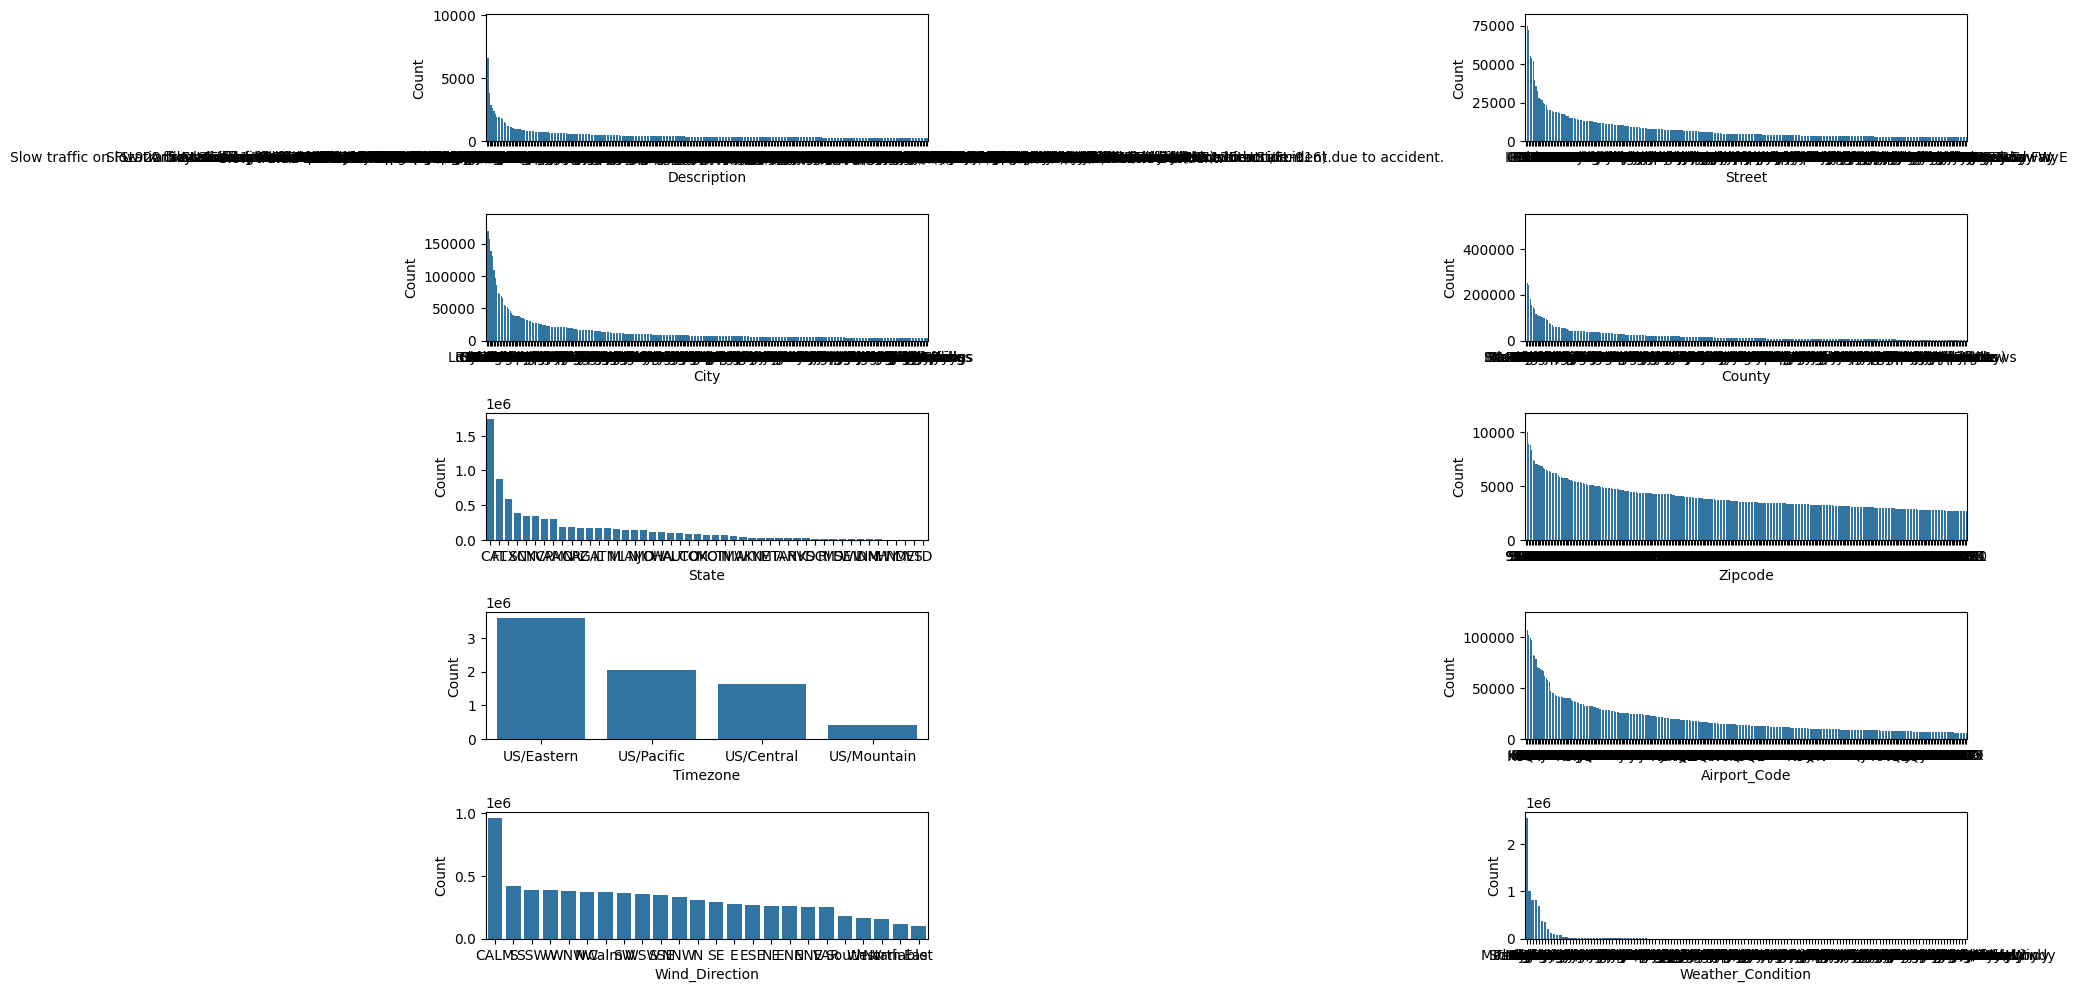

In [ ]:
# We should now encode the categorical columns. For this, check these plots out. From them we can see the count of groups in each column
fig, axes = plt.subplots(5, 2, figsize=(20, 10))
axes_flattened = axes.reshape(-1)
count = 300
for idx, column in enumerate(cat_df.columns):
    ax = axes_flattened[idx]
    value_counts = df[column].value_counts()
    viz_df = pd.DataFrame({column: value_counts.index[:count], 'Count': value_counts.values[:count]})
    sns.barplot(
        x=column,
        y='Count',
        data=viz_df.dropna(),
        ax=ax
        )
    
fig.tight_layout(pad=1.0)

In [ ]:
# The zipcode, airport code, description columns are literally useless, drop them
df.drop(columns=['Zipcode', 'Airport_Code', 'Description'], inplace=True)

In [ ]:
# Since the timezone groups have the same prefix US, it's better to remove this prefix
df['Timezone'] = df['Timezone'].replace({
    "US/Eastern": "Eastern",
    "US/Central": "Central",
    "US/Pacific": "Pacific",
    "US/Mountain": "Mountain"
})

In [ ]:
# Check the null values in the dataset across the categorical columns
nan_df = (df.isnull().mean() * 100).reset_index()
nan_df.columns = ["column_name", "percentage"]
nan_df.sort_values("percentage", ascending=False, inplace=True)
nan_df.head(10)

,column_name,percentage
11,Wind_Direction,2.267083
14,Weather_Condition,2.244271
46,Is_Astronomical_Day,0.300770
45,Is_Twilight_Day,0.300770
44,Is_Civil_Day,0.300770
43,Is_Day,0.300770
2,Street,0.140641
6,Timezone,0.101033
3,City,0.003274
31,Start_Date_Month,0.000000


In [ ]:
#For Weather_Condition columns, replace the values with the most common values. For example, Dust and Sand can be replaces with just Dust, and so on
replacement_words = {
    "Ash": "Ash",
    "Browing": "Browing",
    "Cloud": "Cloudy",
    "Clouds": "Cloudy",
    "Cloudy": "Cloudy",
    "Drizzle": "Rain",
    "Dust": "Dust",
    "Duststorm": "Duststorm",
    "Fair": "Fair",
    "Fog": "Fog",
    "Freezing": "Freezing",
    "Funnel": "Cloudy",
    "Grains": "Hail",
    "Hail": "Hail",
    "Haze": "Fog",
    "Ice": "Ice",
    "Mist": "Fog",
    "Mix": "Mix",
    "Overcast": "Cloudy",
    "Rain": "Rain",
    "Sand": "Dust",
    "Shower": "Rain",
    "Showers": "Rain",
    "Sleet": "Snow",
    "Smoke": "Ash",
    "Snow": "Snow",
    "Squalls": "Squalls",
    "T-Storm": "Tornado",
    "Whirls": "Whirls",
    "Whirlwinds": "Whirls",
    "Windy": "Windy",
    "Wintry": "Snow",
    "Clear": "Clear",
    "Thunder": "Thunder",
    "Thunderstorm": "Thunder",
    "Thunderstorms": "Thunder",
}

In [ ]:
df['Weather_Condition'] = df['Weather_Condition'].replace({"N/A": np.nan})

In [ ]:
processed_weather_condition = df.dropna()['Weather_Condition'].apply(
    lambda x: ' '.join(
        set(
            sorted(
                    [
                    replacement_words[word] for word in x.split(" ") if word in replacement_words.keys()
                    ]
                )
            )
        ) 
    )
# If the values have the word Mix, then replace them with just Mix, because they're a lot of types of Mix
for index in processed_weather_condition.index:
    if 'Mix' in processed_weather_condition[index]:
        processed_weather_condition[index] = 'Mix'
        
df['Weather_Condition'] = processed_weather_condition.replace({'': np.nan})

In [ ]:
df['Weather_Condition'] = df.groupby('Severity')['Weather_Condition'].transform(lambda x: x.fillna(x.mode()[0]))

['Rain', 'Cloudy', 'Snow', 'Fog', 'Clear', 'Freezing', 'Ash', 'Thunder', 'Fair', 'Dust', 'Windy', 'Hail', 'Tornado', 'Ice', 'Mix']


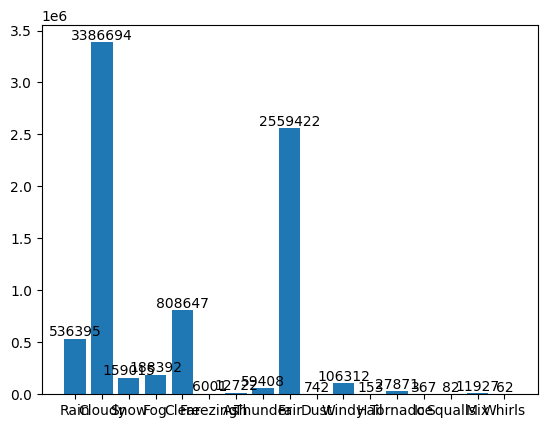

In [ ]:
words = set()
repeat_count = dict()
for line in df['Weather_Condition']:
    for word in line.split(" "):
        if word in words:
            repeat_count[word] += 1
        else:
            words.add(word)
            repeat_count[word] = 1    
            
print([word for word in repeat_count.keys() if repeat_count[word] >= 100])

plt.bar(repeat_count.keys(), repeat_count.values())
for idx, count in enumerate(repeat_count.values()):
    plt.text(idx, count, str(count), ha='center', va='bottom')

In [ ]:
new_columns = np.zeros((len(words), len(df)), dtype=float)

for i, line in enumerate(df['Weather_Condition']):
    line_words = set(line.split(" "))
    for k, word in enumerate(words):
        if word in line_words:
            new_columns[k][i] = 1.0
            
for idx, word in enumerate(words):
    new_column = pd.Series(new_columns[idx])
    new_column.index = df.index
    df[word] = new_column
    

In [ ]:
# After replacing, delete the Weather_Condition column
df.drop(columns=['Weather_Condition'], inplace=True)

In [ ]:
# Like the Timezone column, do the same with the Wind_Direction column
df['Wind_Direction'] = df['Wind_Direction'].replace({'South': 'S',
                                                                 'West': 'W',
                                                                 'North': 'N',
                                                                 'Variable': 'VAR',
                                                                 'East': 'E',
                                                                 'Calm': 'CALM'
                                                                 })

In [ ]:
# NaN values fill with VAR
df['Wind_Direction'].fillna('VAR', inplace=True)

In [ ]:
# Also Street is literally useless because of the difficulty of encoding it
df.drop(columns=['Street'], inplace=True)

In [ ]:
# Dropping all NaN values
df.dropna(inplace=True)

In [ ]:
# Time to encode the categorical columns. For TimeZone and Wind_Direction columns, we can use OneHotEncoder
onehot_encoder = OneHotEncoder(sparse_output=False, min_frequency=5*10**(-4), handle_unknown="ignore")

encoded_categorical_columns = pd.DataFrame(onehot_encoder.fit_transform(df[['Timezone', 'Wind_Direction']]))

encoded_categorical_columns.columns = onehot_encoder.get_feature_names_out()
encoded_categorical_columns.index = df.index

encoded_categorical_columns

,Timezone_Central,Timezone_Eastern,Timezone_Mountain,Timezone_Pacific,Wind_Direction_CALM,Wind_Direction_E,Wind_Direction_ENE,Wind_Direction_ESE,Wind_Direction_N,Wind_Direction_NE,...,Wind_Direction_NW,Wind_Direction_S,Wind_Direction_SE,Wind_Direction_SSE,Wind_Direction_SSW,Wind_Direction_SW,Wind_Direction_VAR,Wind_Direction_W,Wind_Direction_WNW,Wind_Direction_WSW
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7728390,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7728391,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7728392,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
for column_name in onehot_encoder.get_feature_names_out():
    df[column_name] = encoded_categorical_columns[column_name]

In [ ]:
df.drop(columns=['Timezone', 'Wind_Direction'], inplace=True)

In [ ]:
# For City and Country just use CountEncoder
count_encoder_city = ce.CountEncoder(normalize=True)
df['City_Encoded'] = count_encoder_city.fit_transform(df['City'])

count_encoder_county = ce.CountEncoder(normalize=True)
df['County_Encoded'] = count_encoder_city.fit_transform(df['County'])

In [ ]:
df['City_Encoded']

0          0.003189
1          0.000062
2          0.000391
3          0.003189
4          0.003189
             ...   
7728389    0.003560
7728390    0.007211
7728391    0.001176
7728392    0.000594
7728393    0.000195
Name: City_Encoded, Length: 7697340, dtype: float64

In [ ]:
df.drop(columns=['County', 'City'], inplace=True)

In [ ]:
# State can be replaced with LabelEncoder
label_encoder_state = LabelEncoder()
encoded = pd.Series(label_encoder_state.fit_transform(df['State']))
encoded.index = df.index
df['State_Encoded'] = encoded

In [ ]:
df['State_Encoded']

0          33
1          33
2          33
3          33
4          33
           ..
7728389     3
7728390     3
7728391     3
7728392     3
7728393     3
Name: State_Encoded, Length: 7697340, dtype: int64

In [ ]:
df.drop(columns=['State'], inplace=True)

### _Booling features analysis_

In [ ]:
# Just convert true to 1.0 and false to 0.0
for column in bool_df.columns:
    df[column] = df[column].map({True: 1.0, False: 0.0}).astype(float)

### Visualize all features after cleaning

In [ ]:
df.columns

Index(['Severity', 'Distance(mi)', 'Temperature(F)', 'Humidity(%)',
       'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Amenity', 'Bump', 'Crossing', 'Give_Way',
       'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop',
       'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Lat', 'Lng',
       'Start_Date_Year', 'Start_Date_Month', 'Start_Date_Day',
       'Start_Date_Hour', 'End_Date_Year', 'End_Date_Month', 'End_Date_Day',
       'End_Date_Hour', 'Weather_Datestamp_Year', 'Weather_Datestamp_Month',
       'Weather_Datestamp_Day', 'Weather_Datestamp_Hour', 'Time_Difference',
       'Is_Day', 'Is_Civil_Day', 'Is_Twilight_Day', 'Is_Astronomical_Day',
       'Cloudy', 'Mix', 'Fair', 'Snow', 'Hail', 'Rain', 'Dust', 'Thunder',
       'Tornado', 'Whirls', 'Freezing', 'Ash', 'Windy', 'Ice', 'Fog', 'Clear',
       'Squalls', 'Timezone_Central', 'Timezone_Eastern', 'Timezone_Mountain',
       'Timezone_Pacific', 'Wind_Direction_CALM', 

In [ ]:
fig, axes = plt.subplots(11, 8, figsize=(20, 20))
axes_flattened = axes.reshape(-1)

for idx, col_name in enumerate(df.columns):
    ax = axes_flattened[idx]
    stats.probplot(df[col_name], dist="norm", plot=ax)
    ax.set_title(col_name)
    
fig.tight_layout(pad=1.0)

: 